In [3]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from googletrans import Translator
plt.style.use("seaborn-whitegrid")

## Visualize số ca cháy rừng từng tháng ở Amazon

In [4]:
data = pd.read_csv('../Data/Pratice/amazon.csv')

In [5]:
data.head(4)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01


In [6]:
data.shape

(6454, 5)

In [7]:
# xac dinh top value, frequency,...
data.describe(include = 'all')

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,2013-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,108.293163,NaN
std,5.746654,NaN,NaN,190.812242,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,3.000000,NaN
50%,2007.000000,NaN,NaN,24.000000,NaN
75%,2012.000000,NaN,NaN,113.000000,NaN


In [8]:
#Check null data
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

- Do chủ đề là visualization về cháy rừng qua các tháng nên ta xóa những row có number = 0

In [9]:
data['number'] = data['number'].replace(0, np.nan)
data.dropna(how='any', inplace = True)
data.head(3)

,year,state,month,number,date
5,2003,Acre,Janeiro,10.0,2003-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01


In [10]:
data.shape

(5837, 5)

In [11]:
month_unique = data['month'].unique().tolist()

In [12]:
forest_fire_per_month = data.groupby('month')['number'].sum().astype(int)
forest_fire_per_month = forest_fire_per_month.reindex(month_unique).reset_index()
forest_fire_per_month

,month,number
0,Janeiro,47747
1,Fevereiro,30848
2,Março,30717
3,Abril,28188
4,Maio,34731
5,Junho,56010
6,Julho,92326
7,Agosto,88050
8,Setembro,58578
9,Outubro,88681


# Using Translator
    - Determine the input language
    - Use Translator().translate() to translate to English

In [13]:
translator = Translator()
for month in month_unique:
    detected = translator.detect(month)
    print(detected)

Detected(lang=en, confidence=0.6906946)
Detected(lang=pt, confidence=1.0)
Detected(lang=pt, confidence=1.0)
Detected(lang=es, confidence=0.47058824)
Detected(lang=pt, confidence=0.75)
Detected(lang=pt, confidence=1.0)
Detected(lang=pt, confidence=1.0)
Detected(lang=es, confidence=0.37796605)
Detected(lang=pt, confidence=0.8515625)
Detected(lang=pt, confidence=0.97583973)
Detected(lang=pt, confidence=0.78125)
Detected(lang=pt, confidence=1.0)


In [14]:
for i, m in enumerate(forest_fire_per_month['month']): # Sử dụng enumerate để tương ứng 
    translated = translator.translate(m)
    month1 = translated.text                           # trích ra phần tử tháng dạng text
    forest_fire_per_month.at[i, 'month'] = month1      # gán phần tử dạng text vào các dữ liệu cột month
forest_fire_per_month.replace('Janeiro', 'January', inplace = True)
forest_fire_per_month
print(forest_fire_per_month)

        month  number
0     January   47747
1    February   30848
2       March   30717
3       April   28188
4         May   34731
5        June   56010
6        July   92326
7      August   88050
8   September   58578
9     October   88681
10   November   85508
11   December   57535


In [15]:
## Vẽ Chart

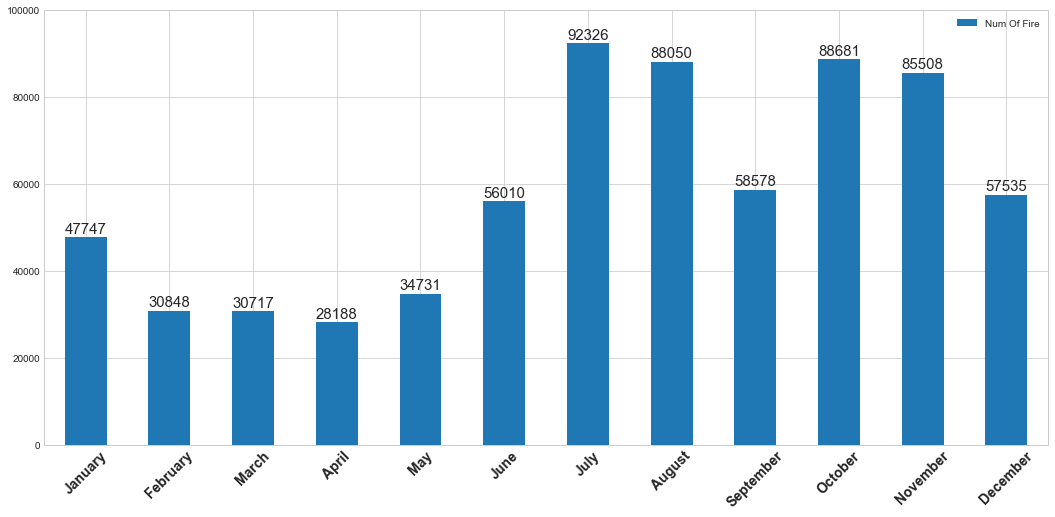

In [16]:
fig, ax = plt.subplots(figsize = (18,8))

forest_fire_per_month.plot.bar(ax = ax)
ax.set_xticklabels(forest_fire_per_month['month'], rotation = 45, fontweight = 'bold', fontsize = 14)
ax.set_ylim(0, 100000)
for i, num in enumerate(forest_fire_per_month['number']):
    ax.text(i,num + 1000, num, ha = 'center', fontsize = 15 )


plt.legend(('Num Of Fire',), loc = 'best') # phải cho legend vào 1 list hoặc tuple để k bị mất hiển thị
plt.show()

## Top 5 States Recording highest Forest Fire from 1998 to 2017

In [17]:
# Prepare Data for Plotting
top5_state=data.groupby('state')['number']\
                .sum()\
                .sort_values(ascending = False)\
                .head(5)\
                .reset_index()

In [18]:
# SỬ DỤNG KHI NÀO MUỐN HIGHLIGHT 1 CỘT NÀO ĐÓ
# max_fire = int(top5_state['number'].max())
# status = pd.Series([])
# for i, m in enumerate(top5_state['number']):
#     if m == top5_state['number'].max():
#         status[i] = 'Max'
#     else:
#         status[i] = 'Ok'
# top5_state.insert(2,'Status', status)

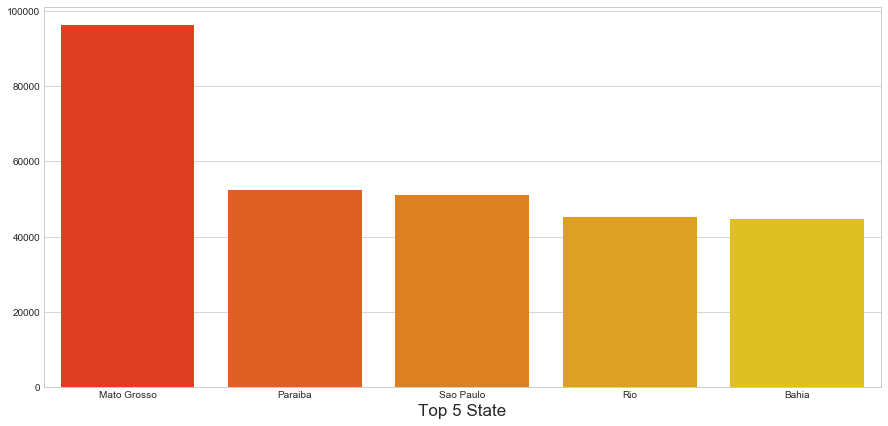

In [19]:
fig, ax = plt.subplots(figsize = (15,7))

sns.barplot(
    x = 'state',
    y = 'number',
    data = top5_state,
    dodge = False,
    palette = 'autumn' # Palette là bộ màu của các cột
   
)
ax.set_xlabel('Top 5 State',fontsize = 17)
ax.set_ylabel(None)

plt.show()

In [20]:
data

,year,state,month,number,date
5,2003,Acre,Janeiro,10.0,2003-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
12,2010,Acre,Janeiro,1.0,2010-01-01
17,2015,Acre,Janeiro,1.0,2015-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [21]:
fire_per_year =  data.groupby('year')['number'].sum().to_frame().reset_index()

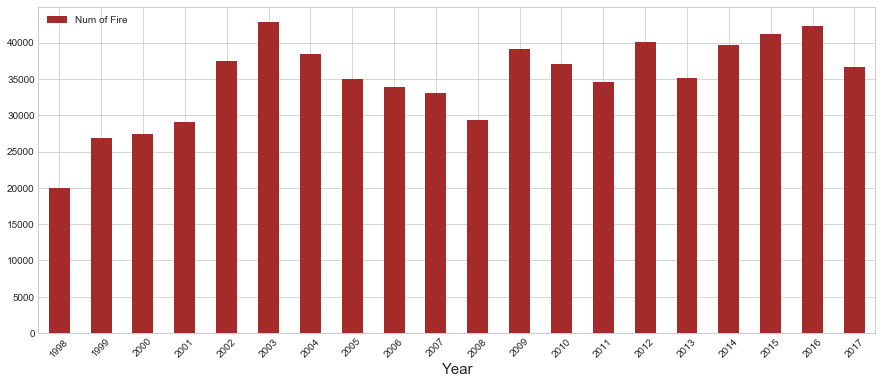

In [22]:
fig, ax = plt.subplots(figsize = (15,6))

fire_per_year.plot.bar(ax=ax, x = 'year', color = 'brown')

ax.set_xlabel('Year', fontsize = 15)
ax.set_xticklabels(fire_per_year['year'],rotation = 45)


plt.legend(('Num of Fire',), loc = 'best')
plt.show()

In [23]:
top5_state

,state,number
0,Mato Grosso,96246.028
1,Paraiba,52435.918
2,Sao Paulo,51121.198
3,Rio,45160.865
4,Bahia,44746.226


In [24]:
fire_per_year.head(3)

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251


In [25]:
data = data.reset_index().drop("index", axis = 1)
data.head(3)

,year,state,month,number,date
0,2003,Acre,Janeiro,10.0,2003-01-01
1,2005,Acre,Janeiro,12.0,2005-01-01
2,2006,Acre,Janeiro,4.0,2006-01-01


In [26]:
data['month'].replace(to_replace = 'Janeiro', value = 'Jan', inplace = True)
data['month'].replace(to_replace = 'Fevereiro', value = 'Feb', inplace = True)
data['month'].replace(to_replace = 'Março', value = 'Mar', inplace = True)
data['month'].replace(to_replace = 'Abril', value = 'Apr', inplace = True)
data['month'].replace(to_replace = 'Maio', value = 'May', inplace = True)
data['month'].replace(to_replace = 'Junho', value = 'Jun', inplace = True)
data['month'].replace(to_replace = 'Julho', value = 'Jul', inplace = True)
data['month'].replace(to_replace = 'Agosto', value = 'Aug', inplace = True)
data['month'].replace(to_replace = 'Setembro', value = 'Sep', inplace = True)
data['month'].replace(to_replace = 'Outubro', value = 'Oct', inplace = True)
data['month'].replace(to_replace = 'Novembro', value = 'Nov', inplace = True)
data['month'].replace(to_replace = 'Dezembro', value = 'Dec', inplace = True)


In [27]:
data['year'].unique()

array([2003, 2005, 2006, 2010, 2015, 2016, 2002, 2004, 2007, 2009, 2017,
       2000, 2012, 2013, 2014, 2011, 1998, 2001, 1999, 2008], dtype=int64)

In [28]:
# lấy ra 1 dataframe gồm các case cháy rừng trong top 5 ban
state_fire_per_year = data[data['state'].isin(top5_state['state'])]\
                                        .groupby(['year','state','month'])\
                                        .sum()\
                                        .reset_index()

In [29]:
state_fire_per_year

,year,state,month,number
0,1998,Bahia,Aug,815.000
1,1998,Bahia,Dec,82.000
2,1998,Bahia,Jul,219.000
3,1998,Bahia,Jun,55.000
4,1998,Bahia,Nov,49.000
...,...,...,...,...
1165,2017,Sao Paulo,Mar,103.000
1166,2017,Sao Paulo,May,43.000
1167,2017,Sao Paulo,Nov,37.000
1168,2017,Sao Paulo,Oct,179.000


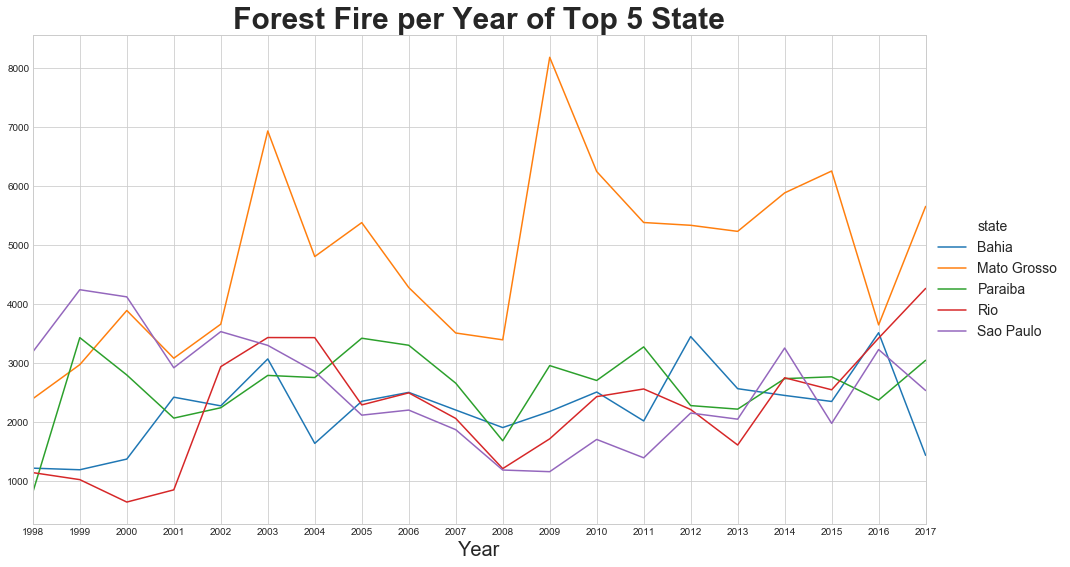

In [36]:
# Plotting
fig, ax = plt.subplots(figsize = (16,9))

sns.lineplot(
    x = 'year',
    y = 'number',
    hue = 'state',
    data = state_fire_per_year,
    estimator = 'sum',
    err_style = None
)
ax.xaxis.set_major_locator(plt.MaxNLocator(19)) #Mathplotlib.org, cái này là set up lại nguyên cái xbar theo ý mình 
ax.set_xlim(1998, 2017)
ax.set_xlabel('Year', fontsize = 20)
ax.set_ylabel(None)
ax.set_title('Forest Fire per Year of Top 5 State', fontsize = 30, fontweight = 'bold')

plt.legend(loc = 'center left',bbox_to_anchor=(1, 0.5), prop={'size': 14})  # bbox_to_anchor=(1, 0.5), prop={'size': 14} dùng để customize vị trí legend
plt.show()